In [13]:
import numpy 
from matplotlib import pyplot as plt
from scipy.integrate import odeint
MM_ethanol=46.0/2.0 #per cmol
MM_biomass=24.6     #per cmol

In [14]:
mumax=0.12
thetamax=0.1
Kp=2.5
Km_mu=0.0004
Km_theta=0.00005
Cp_star=1.95

alpha=0.1
beta=0.1
gamma=1.8

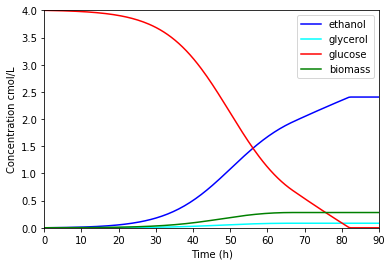

In [16]:
#Functions
def resp_func(C):
    Cs, Cx, Cg, Ce=C[0], C[1], C[2], C[3]
    Cp=Ce
    mu1=mumax*Cs/(Km_mu+Cs)*(1-Cp/Cp_star)
    theta=thetamax*Cs/(Km_theta+Cs)*(1+Cp/Kp)**(-1)
    if mu1<0.0001:
        mu=0
    else:
        mu=mu1
    
    S = numpy.matrix([[-1,1+alpha,1,0,0],
                      [ 0,0,-1,1,1.5],
                      [  0,beta,0,-1/3,0],
                      [ 0,-gamma,-1/3,0,1],
                      [ 0,1,0,0,0]])
    U = numpy.matrix([0, 0, 0, theta, mu]).T
    r = numpy.linalg.solve(S, U) 
        
    
    return [-r[0,0],   # glucose
            r[1,0],    # biomass
            r[3,0],   # glycerol
            r[4,0],   # ethanol   
            theta]

def ferm_eq(C,t):
    Cs, Cx, Cg, Ce = C[0],C[1],C[2],C[3]  # order of components very important 
    r=resp_func([Cs, Cx, Cg, Ce])      # this is the 'fetching' from the response function
    
    return [r[0]*Cx, #DE
            r[1]*Cx, #DE
            r[2]*Cx, #DE
            r[3]*Cx, #DE
            r[3] ]   #rate of ethanol  

#Integration
C0=[120/30, 0.001,0,0, 0]                     # [Cxo, Cso, Cgo, Ceo] in cmol/L                                   # Integrate for 20 hours  
t=numpy.linspace(0,100,200)
C = odeint(ferm_eq, C0, t)

Cs=C[:,0]                                  
Cx=C[:,1]
Cg=C[:,2]
Ce=C[:,3]
#re=C[:,4]

plt.plot(t, Ce, color='blue', label='ethanol')
plt.plot(t, Cg, color='cyan', label='glycerol')
plt.plot(t, Cs, color='red',label='glucose')
plt.plot(t, Cx, color='green',label='biomass')
plt.axis([0,90, 0, 4])
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('Time (h)') 
plt.show()

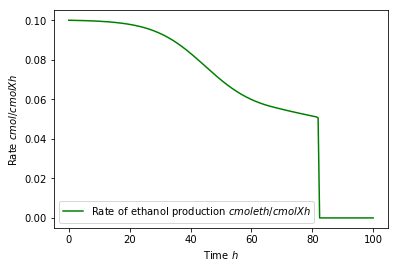

In [17]:
#a)

import numpy 
r1 = numpy.asarray([resp_func(C) for C in C])
re = r1[:,4]

plt.figure()
plt.ylabel("Rate $cmol/cmol X h$")
plt.xlabel("Time $h$")
plt.plot(t, re, "g", label="Rate of ethanol production $cmol eth/cmol X h$")
plt.legend()
plt.show()

In [18]:
#b) We need to find the concentrations Cx, Cs, Cg and Ce at 40 minutes
Cs_40=numpy.interp(40.0, t, Cs)
Cx_40=numpy.interp(40.0, t, Cx)
Cg_40=numpy.interp(40.0, t, Cg)
Ce_40=numpy.interp(40.0, t, Ce)
rates_40=resp_func([Cs_40, Cx_40, Cg_40, Ce_40])
rates_40

[-0.88200956979772083,
 0.089048543521095869,
 0.026714563056328772,
 0.50489440591212442,
 0.08325497026598006]

In [19]:
Ye=rates_40[3]/-rates_40[0]
Ye #in cmol ethanol/cmol X
print ("Ye=", Ye*MM_ethanol/MM_biomass, "g/g")

Ye= 0.535204788621 g/g


In [20]:
#We need mu and re at 40 min in order to find re_Volume:
mu_40=mumax*Cs_40/(Km_mu+Cs_40)*(1-Ce_40/Cp_star)
re_40=numpy.interp(40.0, t, re)
re_40, mu_40

(0.08325616183192376, 0.08904854352109584)

In [33]:
re_V=re_40*mu_40
re_V #cmol ethanol/Lh
re_V*MM_ethanol #g/Lh
print ("re_V=", re_V*MM_ethanol, "g/Lh")

re_V= 0.17051831885665764 g/Lh


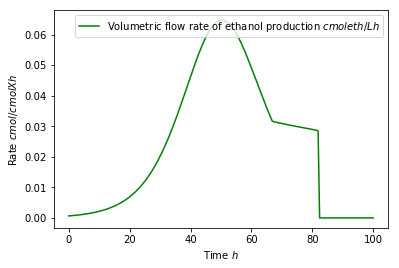

In [32]:
import numpy 

mumax=0.12
thetamax=0.1
Kp=2.5
Km_mu=0.0004
Km_theta=0.00005
Cp_star=1.95
Cp=Ce
Cp_curve=numpy.linspace(0,3,200)

mu1=mumax*Cs/(Km_mu+Cs)*(1-Cp/Cp_star)

#mu_curve=mumax*(1-Cp_curve/Cp_star)

r2 = numpy.asarray([resp_func(C) for C in C])
rve = r2[:,3]*Cx

plt.figure()
plt.ylabel("Rate $cmol/cmol X h$")
plt.xlabel("Time $h$")
plt.plot(t, rve, "g", label="Volumetric flow rate of ethanol production $cmol eth/L h$")
plt.legend()
plt.show()

In [38]:
rve_40 = numpy.interp(40, t[::1], rve[::1])
rs = r1[::,1]

print ('Volumetric rate of ethanol after 40 hours=' + str(rve_40*23) + 'g/L.h')

re_40 = numpy.interp(40, t[::1], re[::1])
rs_40 = -numpy.interp(40, t[::1], rs[::1])
Ye = (re_40*23)/(rs_40*30)

print (Ye)


Volumetric rate of ethanol after 40 hours=1.0638385641938193g/L.h
-0.7167969454646158


In [39]:
#c) Repeat part b with 70 minutes instead of 40
Cs_70=numpy.interp(70.0, t, Cs)
Cx_70=numpy.interp(70.0, t, Cx)
Cg_70=numpy.interp(70.0, t, Cg)
Ce_70=numpy.interp(70.0, t, Ce)
rates_70=resp_func([Cs_70, Cx_70, Cg_70, Ce_70])
Ye=rates_70[3]/-rates_70[0]
Ye #in cmol ethanol/cmol X
print ("Ye=", Ye*MM_ethanol/MM_biomass, "g/g")

Ye= 0.623306233062 g/g


In [64]:
#We need mu and re at 40 min in order to find re_Volume:
mu_70=0.0 #Because mu is negative
re_70=numpy.interp(70.0, t, re)
re_V=re_70*mu_70
re_V #cmol ethanol/Lh
re_V*MM_ethanol #g/Lh
print ("re_V=", re_V*MM_ethanol, "g/Lh")
mu_70

re_V= 0.0 g/Lh


0.0